In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('forestfires.csv')
data.head

<bound method NDFrame.head of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [65]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [66]:
data['area'].count

<bound method Series.count of 0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64>

In [67]:
data=data.drop(['X','Y','month','day'],axis=1)

In [68]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Regression


In [69]:
from pycaret.regression import *
reg1 = setup(data = data, target = 'area')

SyntaxError: invalid syntax (1231202002.py, line 1)

In [ ]:
best_model=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,11.6937,2360.2812,34.2878,-0.1095,1.3954,0.9900,0.0470
br,Bayesian Ridge,16.2423,2284.6179,33.7893,-0.1289,1.9748,4.6132,0.0230
dummy,Dummy Regressor,16.2229,2284.2168,33.7835,-0.1289,1.9737,4.5910,0.0270
llar,Lasso Least Angle Regression,16.2229,2284.2168,33.7835,-0.1289,1.9737,4.5910,0.0250
omp,Orthogonal Matching Pursuit,16.5383,2293.9581,34.0896,-0.1823,1.9639,5.3254,0.0210
par,Passive Aggressive Regressor,15.4690,2367.4424,34.8078,-0.1868,1.7650,3.6814,0.0210
lasso,Lasso Regression,16.8557,2316.3807,34.6588,-0.2911,1.9754,5.0970,0.0340
en,Elastic Net,16.8476,2315.1562,34.6477,-0.2916,1.9739,5.0917,0.0280
ridge,Ridge Regression,17.0544,2328.4017,34.9887,-0.3416,1.9754,5.1698,0.0290
lar,Least Angle Regression,17.2585,2370.2338,35.7927,-0.4734,1.9771,5.2118,0.0270


In [ ]:
print(best_model)

[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize='deprecated', tol=0.001, verbose=False), DummyRegressor(constant=None, quantile=None, strategy='mean')]


In [ ]:
huber_model =create_model('huber', fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.9841,413.8955,20.3444,-0.0748,1.3015,0.7397
1,4.8190,105.7120,10.2816,-0.0551,1.1984,1.3270
2,59.2761,35019.6249,187.1353,-0.1030,1.9055,1.3946
3,5.0863,155.6290,12.4751,-0.0459,1.1279,0.5202
4,15.7681,2261.3572,47.5537,-0.1027,1.5037,1.0295
5,5.2627,104.7876,10.2366,-0.0745,1.1883,1.0144
6,6.4662,197.6316,14.0582,-0.1063,1.2452,1.4853
7,2.4241,9.8078,3.1317,-0.0801,0.9526,0.8216
8,6.5696,166.2915,12.8954,-0.1296,1.3391,0.9037


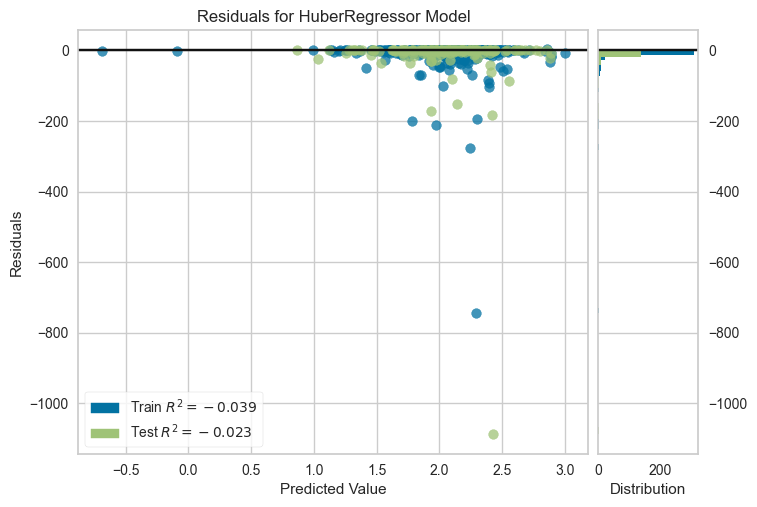

In [ ]:
plot_model(huber_model)

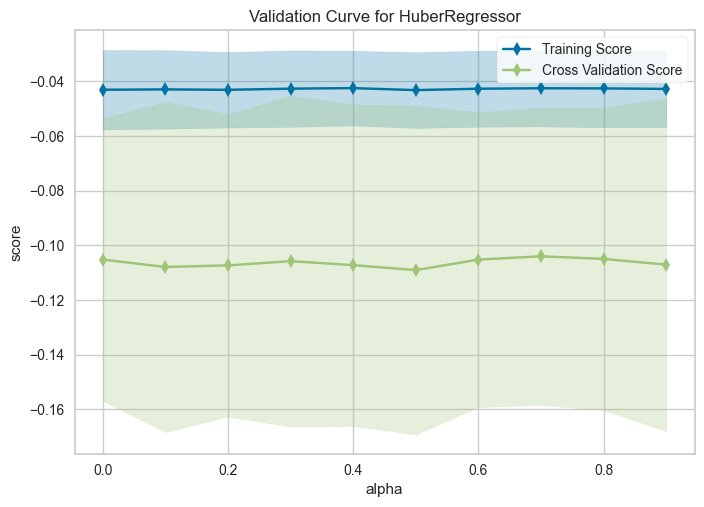

In [ ]:
plot_model(huber_model,'vc')

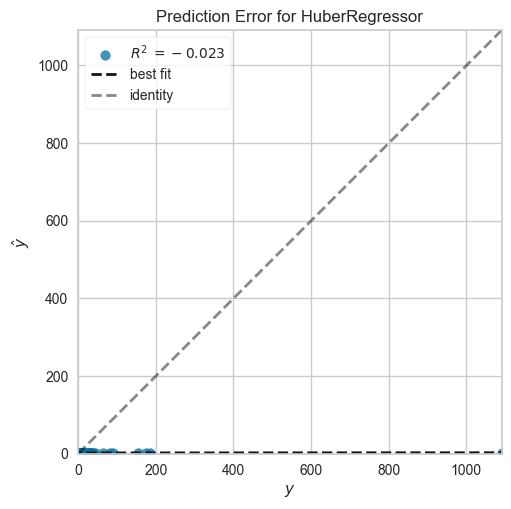

In [ ]:
plot_model(huber_model,'error')

##### Classification

In [ ]:
def preprocessing(df):
    df=df.copy()
    df['area']=df['area'].apply(lambda x: 1 if x>0 else 0)
    return df

In [ ]:
df=preprocessing(data)

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [ ]:
from pycaret.classification import *
reg2 = setup(data = df, target = 'area')

,Description,Value
0,Session id,6515
1,Target,area
2,Target type,Binary
3,Original data shape,"(517, 9)"
4,Transformed data shape,"(517, 9)"
5,Transformed train set shape,"(361, 9)"
6,Transformed test set shape,"(156, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6207,0.6147,0.6178,0.6399,0.6261,0.2407,0.2437,0.0390
lightgbm,Light Gradient Boosting Machine,0.5793,0.5783,0.6137,0.5997,0.6042,0.1557,0.1568,0.0470
et,Extra Trees Classifier,0.5790,0.5841,0.6243,0.5977,0.6081,0.1542,0.1560,0.1560
gbc,Gradient Boosting Classifier,0.5681,0.5612,0.6187,0.5911,0.6008,0.1305,0.1332,0.0830
rf,Random Forest Classifier,0.5679,0.5875,0.5924,0.5928,0.5889,0.1331,0.1354,0.1700
lr,Logistic Regression,0.5429,0.5219,0.6924,0.5496,0.6109,0.0715,0.0761,0.0500
lda,Linear Discriminant Analysis,0.5402,0.5172,0.6816,0.5467,0.6056,0.0665,0.0716,0.0420
ridge,Ridge Classifier,0.5374,0.0000,0.6816,0.5446,0.6044,0.0610,0.0659,0.0220
ada,Ada Boost Classifier,0.5350,0.5244,0.5655,0.5586,0.5598,0.0658,0.0655,0.0750
dt,Decision Tree Classifier,0.5345,0.5296,0.5401,0.5619,0.5433,0.0689,0.0706,0.0280


In [ ]:
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
KNeighborsClassifier_model=create_model('knn', fold = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.5722,0.5000,0.6250,0.5556,0.1648,0.1685
1,0.5000,0.4568,0.5556,0.5000,0.5263,0.0000,0.0000
2,0.5556,0.6358,0.4444,0.5714,0.5000,0.1111,0.1140
3,0.3333,0.3148,0.2222,0.2857,0.2500,-0.3333,-0.3419
4,0.7778,0.7901,0.7778,0.7778,0.7778,0.5556,0.5556
5,0.7778,0.6914,0.6667,0.8571,0.7500,0.5556,0.5698
6,0.6111,0.6358,0.5556,0.6250,0.5882,0.2222,0.2236
7,0.8333,0.8704,1.0000,0.7500,0.8571,0.6667,0.7071
8,0.6667,0.6543,0.6667,0.6667,0.6667,0.3333,0.3333


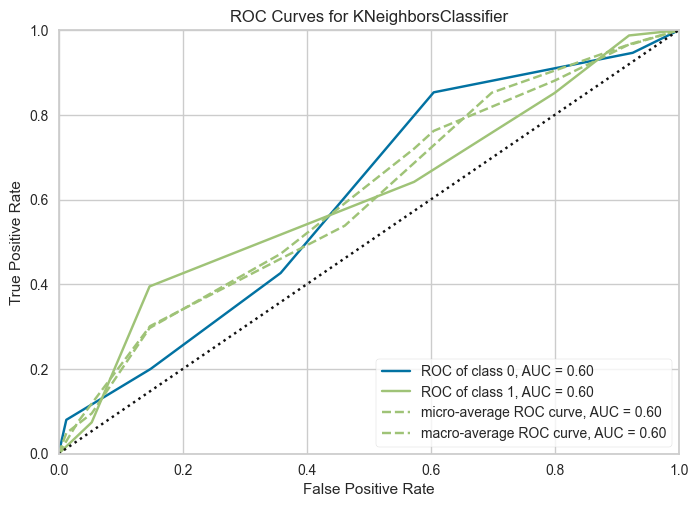

In [ ]:
plot_model(KNeighborsClassifier_model)

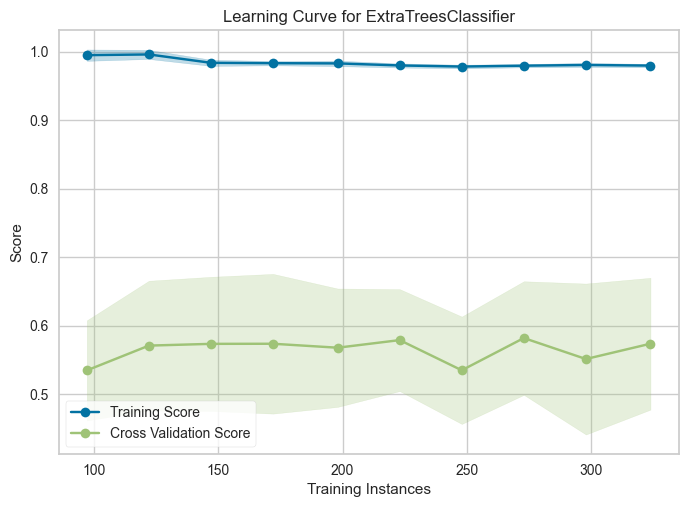

In [ ]:
plot_model(KNeighborsClassifier_model,'learning')

In [ ]:
tuned_KNeighborsClassifier_model=tune_model(KNeighborsClassifier_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5946,0.5322,0.6316,0.6000,0.6154,0.1874,0.1877
1,0.6111,0.5309,0.6667,0.6000,0.6316,0.2222,0.2236
2,0.6944,0.7678,0.5789,0.7857,0.6667,0.3963,0.4122
3,0.6111,0.6130,0.6842,0.6190,0.6500,0.2150,0.2163
4,0.6944,0.6625,0.7895,0.6818,0.7317,0.3812,0.3868
5,0.5833,0.5402,0.7368,0.5833,0.6512,0.1509,0.1574
6,0.5278,0.5186,0.4737,0.5625,0.5143,0.0613,0.0622
7,0.6389,0.5387,0.7368,0.6364,0.6829,0.2688,0.2727
8,0.6944,0.7276,0.7368,0.7000,0.7179,0.3851,0.3857


Fitting 10 folds for each of 10 candidates, totalling 100 fits


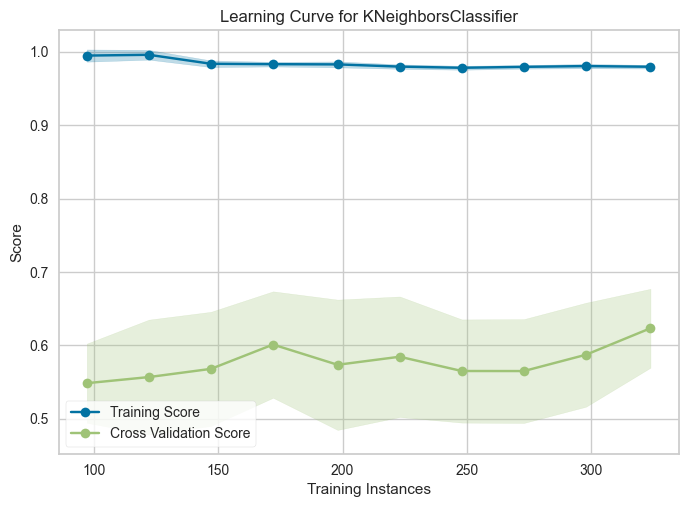

In [ ]:
plot_model(tuned_KNeighborsClassifier_model,'learning')

In [ ]:
save_model(tuned_KNeighborsClassifier_model,'forestfiremodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Hp\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['FFMC', 'DMC', 'DC', 'ISI', 'temp',
                                              'RH', 'wind', 'rain'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                                                               fill_value='constant',
                                           